# Analysing Weather Data
By: Hussein Kasim

The following small project was done as an Assignment for the Scientific Programming with Python course taken at Hochschule Bonn-Rhein-Sieg with Prof. Karl Kirschner.


---



**Goal**:   The purpose of this assignment is to become familiar with the Pandas module, and to put into practice the scientific programming concepts learned in the lecture so far.

**Problem and Input Data**:   Understanding weather is a complicated endeavor due to several factors, including is the sparse data collection across the globe, chaos (the butterfly effect) [1], the topology of the Earth's surface [2], and human influences. However, there are some data observables that show correlation in their behavior. The following data was obtained from Open­ Weather, which covers observations made at several locations across Earth [3, 4]:


City citipy : name of the country

Country code citipy : name of the country

Country : name of the country

City ID : identification number of the city

City : name of the city

Country Abbreviation : two-letter country abbreviation

Longitude : decimal coordinates for longitude

Latitude : decimal coordinates for latitude

Temperature (°C) : 12-month averaged ground temperature

Humidity (%) : 12-month averaged humidity

Wind (km/hr) : 12-month averaged wind speed

Clouds(%) : 12-month averaged cloud cover


The Python3 [5, 6] programming language and the Pandas [7, 8] library were used in this assignment.

# Task 1: Loading and preparing the data

In [ ]:
import pandas as pd

First, we must upload the CSV files from my desktop that I have downloaded from the assignment folder on LEA. The following code was run twice, once for each of the two CSV files (weather_northern.csv and weather_southern.csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

(a) Next, we read the data in the CSV files.

We have one column in each of our CSV files and so we must split this column (which has attributes separated by the semi-colon symbol) into multiple columns. This is done using the delimiter parameter.

In [ ]:
northern_weather_data = pd.read_csv('weather_northern.csv', delimiter=';')
southern_weather_data = pd.read_csv('weather_southern.csv', delimiter=';')

(b) Next, we merge both dataframes into a single, new Pandas' dataframe.

In [ ]:
merged_data = pd.concat([northern_weather_data, southern_weather_data])

(c) Next, we must remove the rows with missing data (NaN).

In [ ]:
merged_data = merged_data.dropna() # Drop NaN

(d) Next, we must remove the duplicated rows.

In [ ]:
merged_data = merged_data.drop_duplicates()

(e) Finally, we must remove the columns: 'City citipy', 'Country code citipy', 'City ID'.

In [ ]:
merged_data = merged_data.drop(['City citipy', 'Country code citipy', 'City ID'], axis=1)

Now we have a dataset that is merged and cleaned.


---



# Task 2: Data correlation

(a) We must compute and display a correlation matrix dataframe for the weather numeric data categories using the Pearson method.

This can be done by using the built-in Pandas function corr() and by specifying the method we want to use as a parameter ('pearson').

In [ ]:
correlation_matrix = merged_data.corr(method = 'pearson')

<ipython-input-100-55170fbf8741>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr(method = 'pearson')


Here we see the resulting correlation matrix.

In [ ]:
print(correlation_matrix)

             Longitude  Latitude  Temperature  Humidity      Wind    Clouds
Longitude     1.000000 -0.039844    -0.159890  0.239115 -0.147370 -0.026656
Latitude     -0.039844  1.000000    -0.769651 -0.061628  0.066773  0.085868
Temperature  -0.159890 -0.769651     1.000000  0.082723  0.064944 -0.078059
Humidity      0.239115 -0.061628     0.082723  1.000000  0.038871  0.424319
Wind         -0.147370  0.066773     0.064944  0.038871  1.000000  0.073787
Clouds       -0.026656  0.085868    -0.078059  0.424319  0.073787  1.000000


(b) Next, we must analyze the correlation results and find the categories with the greatest negative correlation value. To do this, we must sort the values and this can only be done after unstacking the matrix. Then, the row with the smallest correlation value is retrieved using the head(1) function.

In [ ]:
max_negative_correlation = correlation_matrix.unstack().sort_values().head(1)

Next, we must retrieve and print the categories.

In [ ]:
category1, category2 = max_negative_correlation.index[0]
print(category1, "and", category2)

Temperature and Latitude


This means that Temperature and Latitude have the greatest negative correlation value. This means that Temperature is inversely proportional to Latitude, so when one increases, the other decreases.


---



# Task 3: Plotting Data

We must create four scatter plots that visualize how the latitude (x-axis) and the following categories are related (y-axis):

1.	Clouds
2.	Humidity
3.	Temperature
4.	Wind


This is done using Pandas' built-in scatter() function.

1. Latitude vs Clouds:

<Axes: title={'center': 'Latitude vs Clouds'}, xlabel='Latitude', ylabel='Clouds'>

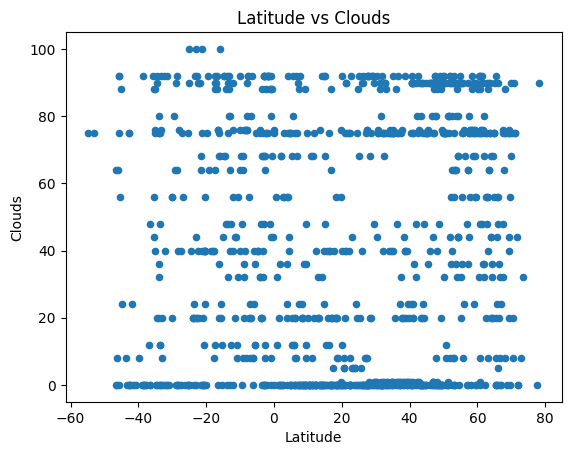

In [ ]:
merged_data.plot.scatter(x='Latitude', y='Clouds', title='Latitude vs Clouds')

2. Latitude vs Humidity:

<Axes: title={'center': 'Latitude vs Humidity'}, xlabel='Latitude', ylabel='Humidity'>

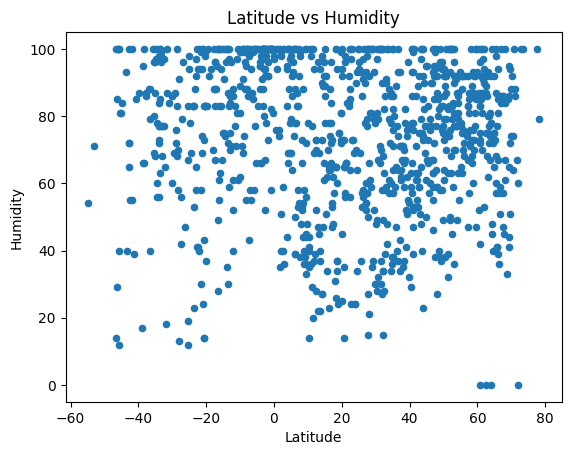

In [ ]:
merged_data.plot.scatter(x='Latitude', y='Humidity', title='Latitude vs Humidity')

3. Latitude vs Temperature:

<Axes: title={'center': 'Latitude vs Temperature'}, xlabel='Latitude', ylabel='Temperature'>

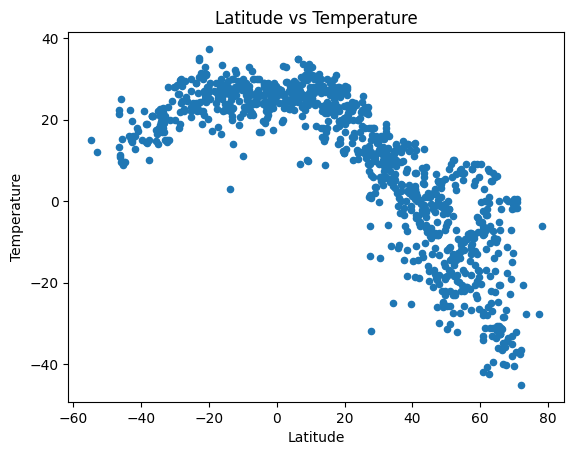

In [ ]:
merged_data.plot.scatter(x='Latitude', y='Temperature', title='Latitude vs Temperature')

4. Latitude vs Wind:

<Axes: title={'center': 'Latitude vs Wind'}, xlabel='Latitude', ylabel='Wind'>

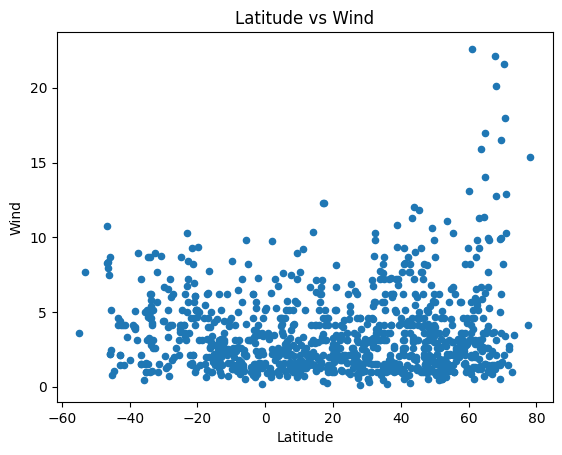

In [ ]:
merged_data.plot.scatter(x='Latitude', y='Wind', title='Latitude vs Wind')



---



# Task 4: Sort and Save

Now, we must sort and save the data.

1. To sort the data based on the Latitude category, the sort_values() function is used with 'Latitude' as the parameter.

In [ ]:
sorted_data = merged_data.sort_values('Latitude')

2. To save the data as a CSV-formatted file, the to_csv() function is used. The index=False parameter removes the first index column as it does not have a relevant category.

In [ ]:
sorted_data.to_csv('sorted_data.csv', index=False) # Final result



---



# References

[1]	Shen, B.-W.; Pielke, R.A.; Zeng, X.; Cui, .J.; Faghih-Naini, S.; Paxson, W. and Atlas, R. Three Kinds of Butterfly Effects within Lorenz Models Encyclopedia, 2 (2022) 1250-1259 (https://doi.org/10.3390/encyclopedia2030084).

[2]	Lehner, M. and Rotach, M.W. Current Challenges in Understanding and Predicting Transport and Exchange in the Atmo­ sphere over Mountainous Terrain Atmosphere, 9 (2018) 276 (https://doi.org/10.3390/atmos9070276).

[3]	joelsotelods,	"Weather	Data	Analysis",	GitHub	repository.	Available	at	https://github.com/joelsotelods/weather-data-analysis.git. Accessed on May 28, 2023.

[4]	OpenWeather, Global Services Weather Forecasts, Nowcasts and History in Fast and Elegant Way. Available at https://openweathermap.org. Accessed on May 28, 2023.

[5]	Python Software Foundation. Python Language Reference, version 3.8. Available at http://www.python.org. Accessed on May 28, 2023.

[6]	van Rossum, G. Python tutorial, Technical Report CS-R9526, Centrum voor Wiskunde en Informatica (CWI), Amsterdam, 1995.

[7]	The  Pandas Development Team pandas-dev /pandas: Pandas Zenodo, 2020 (https://pandas.pydata.org)

[8]	Pandas user guide. Available at https://pandas.pydata.org/docs/user_guide/index.html. Accessed on May 28, 2023.
